In [1]:
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('X_data.csv', encoding='utf-8', index_col=None, sep = ";")
print(data.info)

<bound method DataFrame.info of                   Unnamed: 0  T_data_1_1  ...  H_data  AH_data
0        2015-01-01 00:00:00         212  ...  167.85     9.22
1        2015-01-01 00:01:00         212  ...  162.51     9.22
2        2015-01-01 00:02:00         212  ...  164.99     9.22
3        2015-01-01 00:03:00         213  ...  167.34     9.22
4        2015-01-01 00:04:00         213  ...  163.04     9.22
...                      ...         ...  ...     ...      ...
2103836  2018-12-31 23:56:00         271  ...  157.20     8.44
2103837  2018-12-31 23:57:00         271  ...  160.40     8.44
2103838  2018-12-31 23:58:00         271  ...  160.14     8.44
2103839  2018-12-31 23:59:00         271  ...  162.96     8.44
2103840  2019-01-01 00:00:00         271  ...  159.73     7.35

[2103841 rows x 18 columns]>


In [3]:
data.shape
data.columns

Index(['Unnamed: 0', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1',
       'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2', 'T_data_3_3',
       'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2',
       'T_data_5_3', 'H_data', 'AH_data'],
      dtype='object')

In [4]:
col = ['Unnamed: 0', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1',
       'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2', 'T_data_3_3',
       'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2',
       'T_data_5_3', 'H_data', 'AH_data']

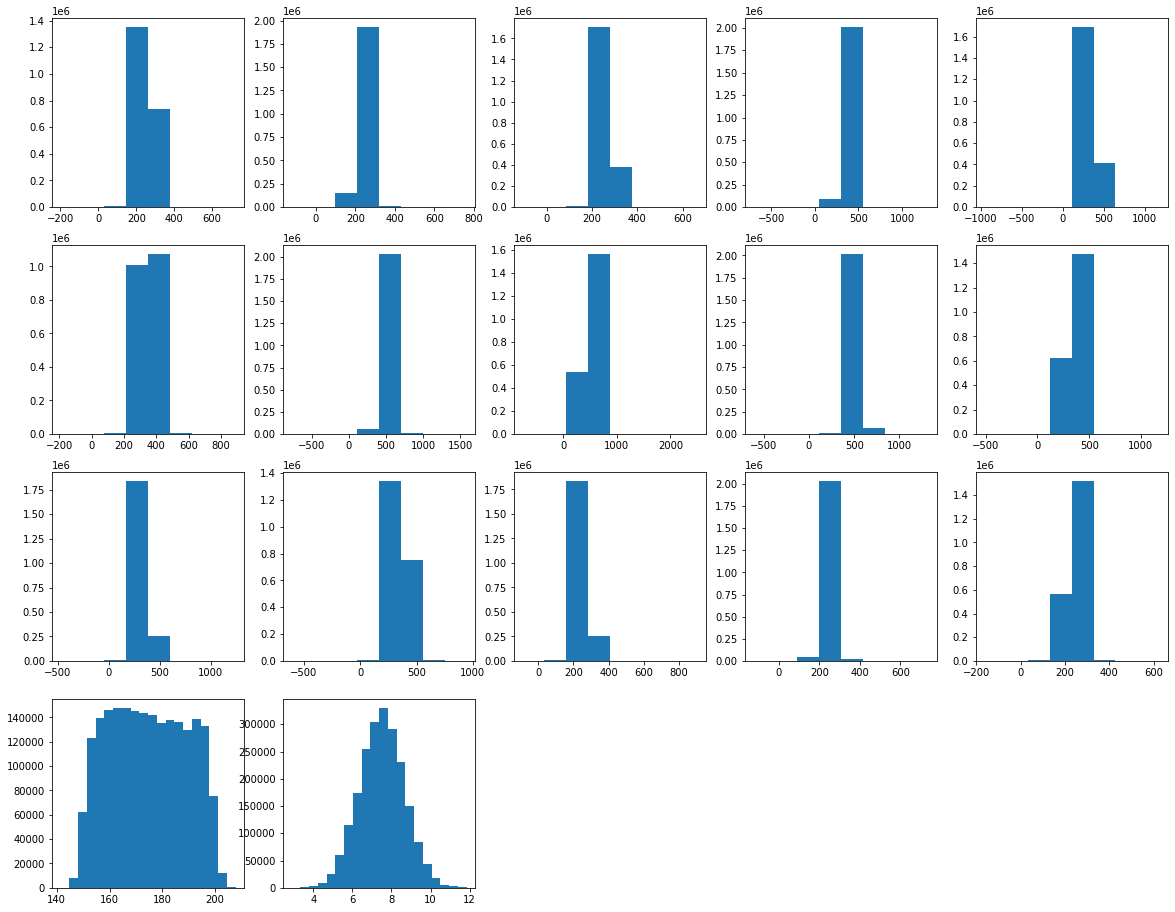

In [5]:
plt.figure(figsize=[20, 16])
for i in range(15):
  plt.subplot(4, 5, i+1)
  plt.hist(data["T_data_" + str(i//3+1) + "_" + str(i%3 +1)], bins=8);

plt.subplot(4, 5, 16)
plt.hist(data["H_data"], bins=20);

plt.subplot(4, 5, 17)
plt.hist(data["AH_data"], bins=20);

In [6]:
data2 = pd.read_csv('Y_train.csv', encoding='utf-8', index_col=None, sep = ";")
print(data2.info)

<bound method DataFrame.info of        2015-01-04 00:05:00  392
0      2015-01-04 01:05:00  384
1      2015-01-04 02:05:00  393
2      2015-01-04 03:05:00  399
3      2015-01-04 04:05:00  400
4      2015-01-04 05:05:00  417
...                    ...  ...
29178  2018-05-03 19:05:00  438
29179  2018-05-03 20:05:00  452
29180  2018-05-03 21:05:00  455
29181  2018-05-03 22:05:00  455
29182  2018-05-03 23:05:00  454

[29183 rows x 2 columns]>


In [7]:
data2.columns

Index(['2015-01-04 00:05:00', '392'], dtype='object')

In [8]:
col2 = ['2015-01-04 00:05:00', '392']

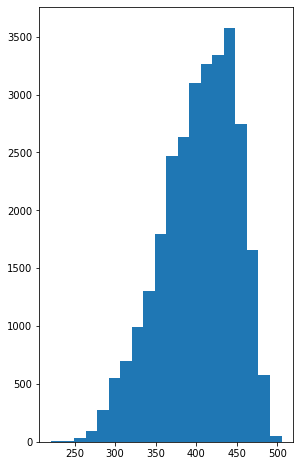

In [9]:
plt.figure(figsize=[10, 8])
plt.subplot(1, 2, 1)
plt.hist(data2['392'], bins=20);

In [10]:
i = 0
for row in data['Unnamed: 0'].values:
  if row == col2[0]:
    train_idx = i
  i += 1
print(train_idx)

4325


In [11]:
data3 = pd.read_csv('Y_submit.csv', encoding='utf-8', index_col=None, sep = ";")
print(data3.info)

<bound method DataFrame.info of       2018-05-04 00:05:00  420
0     2018-05-04 01:05:00  420
1     2018-05-04 02:05:00  420
2     2018-05-04 03:05:00  420
3     2018-05-04 04:05:00  420
4     2018-05-04 05:05:00  420
...                   ...  ...
5802  2018-12-31 19:05:00  420
5803  2018-12-31 20:05:00  420
5804  2018-12-31 21:05:00  420
5805  2018-12-31 22:05:00  420
5806  2018-12-31 23:05:00  420

[5807 rows x 2 columns]>


In [12]:
data3.columns[0], data3.columns[1]

('2018-05-04 00:05:00', '420')

In [13]:
col3 = [data3.columns[0], data3.columns[1]]

In [14]:
i = 0
for row in data['Unnamed: 0'].values:
  if row == col3[0]:
    test_idx = i
  i += 1
print(test_idx)

1755365


#SPLIT STAGE
Разбиваю данные на трейн = 80%, валидацию = 20% и тест

In [15]:
joined_data = data.join(data2.set_index('2015-01-04 00:05:00'), on='Unnamed: 0')
joined_data.at[train_idx, '392'] = 392

In [16]:
train_val_data = joined_data.head(test_idx - 60 + 1)

In [17]:
pre_train_data = train_val_data.head(int(len(train_val_data)*0.8 + 2))
train_data = pre_train_data.tail(len(pre_train_data) - 4266)

In [18]:
val_data = train_val_data.tail(int(len(train_val_data)*0.2 - 1))

In [19]:
joined_data = data.join(data3.set_index('2018-05-04 00:05:00'), on='Unnamed: 0')

In [20]:
test_data = joined_data.tail(data.shape[0] - (test_idx - 60)-1)

In [21]:
print(train_data.shape, val_data.shape, test_data.shape)

(1399980, 19) (351060, 19) (348535, 19)


## Forming (X_train, Y_train), (X_val, Y_val), X_test
# конкатенирую данные каждой минуты из X_data в данные для каждого часа

In [22]:
from tqdm import tqdm

In [23]:
def X_split(data_for_group, col):
  features = col[1:len(col)]
  arr = []
  i = 0
  X = np.zeros((int(len(data_for_group)/60), len(features)*60))
  for row in tqdm(data_for_group[features].values):
    for j in range(len(features)):
      arr.append(row[j])

    i+=1
    if(i%60 == 0):
      X[i//60 - 1]= np.array(arr)
      arr = []
  return X


In [24]:
def Y_split(data_for_group):
  features = '392'
  arr = []
  i = 0
  Y = np.zeros((int(len(data_for_group)/60), 1))

  for row in tqdm(data_for_group[features].values):
    if str(row) != 'nan':
      Y[i//60] = row
    i+=1
  return Y

In [25]:
X_train = X_split(train_data, col)
X_val = X_split(val_data, col)
X_test = X_split(test_data, col)

100%|██████████| 348535/348535 [00:02<00:00, 142042.59it/s]


In [26]:
Y_train = Y_split(train_data)
Y_val = Y_split(val_data)

100%|██████████| 351060/351060 [00:00<00:00, 1337060.30it/s]


In [27]:
print(X_train.shape, Y_train.shape)

(23333, 1020) (23333, 1)


In [28]:
print(X_val.shape, Y_val.shape)

(5851, 1020) (5851, 1)


In [29]:
print(X_test.shape)

(5808, 1020)


#Train_model
Обучение проводится на RandomForest и GradientBoosting, т.к. они хороши для неструктурированных(табличных) данных 

Выбрана модель регресси, т.к. таргет этот оценка, т.е. оценки различные на 1 по значению, должны быть очень близко. А классификатор не учитывает этот момент

##RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

Выбрана модель RandomForestRegressor, т.к. таргет этот оценка, т.е. оценки различные на 1 по значению, должны быть очень близко. А RandomForestClassifier не учитывает этот момент

In [31]:
forest = RandomForestRegressor(n_estimators = 100, criterion = "mae", max_features = "sqrt", n_jobs = -1, random_state=42)
model1 = forest.fit(X_train, Y_train.ravel())

In [32]:
predicted1 = model1.predict(X_val)
print("model1_mae =", mae(Y_val, predicted1))
print("model1_mse =", mse(Y_val, predicted1))

model1_mae = 8.454924799179626
model1_mse = 136.4604738207144


In [33]:
rounded_predicted1 = np.round(predicted1)

In [34]:
print("model1_rounded_mae =", mae(Y_val, rounded_predicted1))
print("model1_rounded_mse =", mse(Y_val, rounded_predicted1))

model1_rounded_mae = 8.451717655101692
model1_rounded_mse = 136.5836609126645


##randomForestClassifier

In [35]:
forest = RandomForestClassifier(n_estimators = 100, max_features = "sqrt", n_jobs = -1, random_state=42)
model2 = forest.fit(X_train, Y_train.ravel())

In [36]:
predicted2 = model2.predict(X_val)
print("model2_mae =", mae(Y_val, predicted2))
print("model2_mse =", mse(Y_val, predicted2))

model2_mae = 12.243035378567766
model2_mse = 271.28730131601435


In [38]:
mae(Y_val, predicted2)

12.243035378567766

In [39]:
mse(Y_val, predicted2)

271.28730131601435

Как и было отмечено выше, классификатор справился хуже, чем регрессор

##GradBoosting

In [40]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [41]:
max_depth = [7,8]
max_features = 'sqrt'
learning_rate = [0.105, 0.11, 0.115, 0.12]
GB_models = []
i = 0
for depth in max_depth:
  for lr in learning_rate:
    i+=1
    reg = GBR(learning_rate = lr, criterion = 'mse', max_features = max_features, random_state=1, max_depth=depth)
    reg.fit(X_train, Y_train.ravel())
    predicted3 = reg.predict(X_val)
    print("mae =", mae(Y_val, predicted3))
    print("mse =", mse(Y_val, predicted3))
    print(i)
    print("=======================================")
    GB_models.append(reg)

mae = 7.757106547157111
mse = 116.39206351777162
1
mae = 7.824868662861285
mse = 117.34926091898639
2
mae = 7.865095173045169
mse = 119.07812234461976
3
mae = 7.848394006838055
mse = 117.7117298866629
4
mae = 7.721450132494306
mse = 115.4711245640586
5
mae = 7.712266696850665
mse = 113.82320766171911
6
mae = 7.729600159864539
mse = 115.78383755740983
7
mae = 7.769265739811584
mse = 117.24163762288707
8


Выбираем лучшую модель согласно лучшему значению mae на валидационной выборке


In [42]:
best_model = GB_models[5]
best_pred = best_model.predict(X_val)
print("mae =", mae(Y_val, best_pred))
print("mse =", mse(Y_val, best_pred))

true_pred = np.round(best_pred)
true_pred
print("true_mae =", mae(Y_val, true_pred))
print("true_mse =", mse(Y_val, true_pred))

mae = 7.712266696850665
mse = 113.82320766171911
true_mae = 7.708425910100837
true_mse = 113.77508118270381


In [43]:
test_pred = np.round(best_model.predict(X_test))
print(len(test_pred))

5808


## Скачиваю file.csv 

In [44]:
array = [[data3.columns[0], test_pred[0]]]
i = 1
for row in data3[["2018-05-04 00:05:00", "420"]].values:
  array.append([row[0], test_pred[i]])
  i += 1
df = pd.DataFrame(array, columns=['date_and_time', 'quality'])

In [45]:
df.to_csv('file.csv', index=False, header=None)